In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

import covid
from covid import data
from covid.models import SEICHAR, SEICHARDemographic
from covid.utils import pm, pc, fmt


# Constants
now = datetime.datetime.now()
today = datetime.date(now.year, now.month, now.day)
day = datetime.timedelta(days=1)
plt.rcParams['figure.figsize'] = [10, 8]
sns.set(style="darkgrid")

In [2]:
# Parameters
region_name = 'Brazil/São Paulo'
seed = 1000
first_case = datetime.date(2020, 2, 25)
i18n = 'pt-BR'
time_final = 180

In [4]:
# Derived variables
region = covid.region(region_name)
covid.set_i18n(i18n)

# Relatório de propagação do COVID-19: {{ region.short_name }}

Covid-19 é uma ameaça global, XXX.

Este relatório faz uma previsão da velocidade de alastramento da epidemia de COVID-19 e do impacto desta no sistema de saúde. Fazemos algumas recomendações de ações para conter ou diminuir a velocidade de alastramento do vírus, além de recomendações sobre o tempo ideal para realizar as intervenções.

A simulação possui algumas limitações e incertezas, principalmente porque ainda não conhecemos com muita precisão alguns parâmetros epidemiológicos e clínicos da doença. Alguns destes fatores possuem enorme impacto sobre o resultado final. Dependendo do caso, pequenas variações destes parâmetros podem afetar bastante o resultado das simulações.  

## Características básicas da região

**Nome:** {{ region }}

**População:** {{ fmt(region.population_size) }}
* 0-19:
* 20-49:
* 50+:

**Leitos** 
* Enfermaria: {{ region.hospital_total_capacity }}
* UTI: {{ region.population_size }}

## Cenário base sem nenhuma intervenção

A simulação a seguir considera os valores demográficos e da saúde da região caso não haja interferência

In [5]:
region = covid.Region('Brazil')

pa = region.demography.values * 0 + 0.14
pa = pa * 0.5 + (1 - pa) * 0.85 * np.exp(-(8 - np.arange(9)) / 2.5)


m1 = SEICHARDemographic(region=region, seed=7000, R0=2.5)
m1m = SEICHARDemographic(region=region, seed=7000, R0=1.5)

m1.prob_hospitalization = 2.0 * m1.prob_hospitalization.copy()
m1m.prob_hospitalization = 2.0 * m1m.prob_hospitalization.copy()


m2 = SEICHARDemographic(region=region, seed=7000, R0=2.5, prob_symptomatic=0.5)
m2m = SEICHARDemographic(region=region, seed=7000, R0=1.5, prob_symptomatic=0.5)

m3 = SEICHARDemographic(region=region, seed=7000, R0=2.5)
m3m = SEICHARDemographic(region=region, seed=7000, R0=1.5)
m3.prob_symptomatic = pa
m3m.prob_symptomatic = pa

m1.run(time_final)
m2.run(time_final)
m1m.run(time_final)
m2m.run(time_final)
m3.run(time_final)
m3m.run(time_final)

TypeError: __init__() missing 1 required positional argument: 'demography'

NameError: name 'm1' is not defined

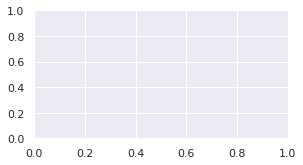

In [6]:
plt.subplot(321)
m1.plot.healthcare_overflow(ymin=100, title='Sem mitigação', ylabel='86% assintomáticos', xticks=None)
plt.ylim((1000, 2e6))

plt.subplot(323)
m2.plot.healthcare_overflow(ymin=100, title=None, ylabel='50% assintomáticos', xticks=None)
plt.ylim((1000, 2e6))

plt.subplot(325)
m3.plot.healthcare_overflow(ymin=100, title=None, ylabel='Variável')
plt.ylim((1000, 2e6))


plt.subplot(322)
m1m.plot.healthcare_overflow(ymin=100, title='Mitigação 60%', xticks=None, ylabel=None)
plt.ylim((1000, 2e6))

plt.subplot(324)
m2m.plot.healthcare_overflow(ymin=100, title=None, ylabel=None, xticks=None)
plt.ylim((1000, 2e6))

plt.subplot(326)
m3m.plot.healthcare_overflow(ymin=100, title=None, ylabel=None)
plt.ylim((1000, 2e6))


plt.savefig('hosp_scenarios.png')

In [6]:
m3s= SEICHARDemographic(region=region, seed=7000, R0=0.9, prob_symptomatic=0.5)
m3s.run(time_final)

In [11]:
print(m1m)


SIMULATION PARAMETERS (SEICHARDemographic)

Parameters
- R0                : 1.50
- P(is symptomatic) : 14.00%


SIMULATION RESULTS (SEICHARDemographic)

Demography
- Total population   : 212.55mi
- Recovered          : 116.42mi (54.77%)
- Fatalities (total) : 0.47mi (0.23%)
- Infectious (max)   : 16.37mi (7.70%)
- Asymptomatic (max) : 100.58mi (47.32%)
- Exposed (max)      : 835.41mi (393.03%)
- Fatalities demography: 
           fatalities  fatalities (%)   IFR (%)    CFR (%)
    age                                                   
    0-9           140        0.000485  0.000162   0.003588
    10-19         596        0.001913  0.000488   0.010827
    20-29        2409        0.007065  0.002004   0.044455
    30-39        7554        0.021911  0.005358   0.118866
    40-49       13609        0.046193  0.010330   0.229167
    50-59       42224        0.172901  0.041796   0.927136
    60-69      106338        0.629334  0.155263   3.443232
    70-79      153084        1.739397  0.366

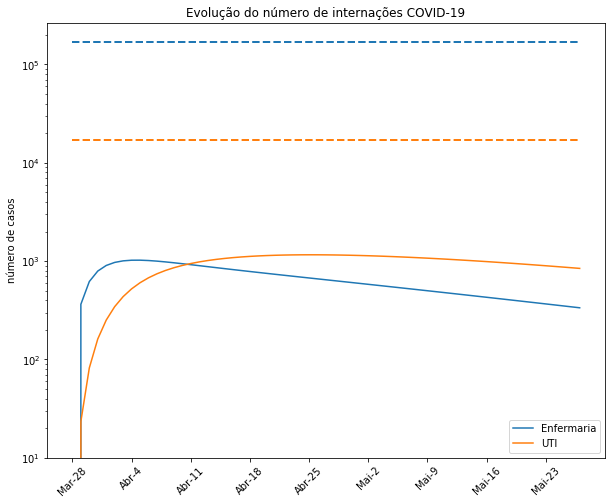

In [42]:
m3s.plot.healthcare_overflow()

In [5]:
m_base = SEICHARDemographic(region=region, seed=seed)
m_base.run(time_final)

m_base.data.loc[:30, [('hospitalized'), ('critical')]].plot.bar(width=1.5, label=['Hospitalizados', 'Críticos'])
sns.lineplot(x=[0, 30], y=[m_base.hospital_capacity]*2, lw=4)
sns.lineplot(x=[0, 30], y=[m_base.icu_capacity]*2, lw=4)

T = np.arange(0, 30 + 1, 3)
plt.xticks(T, today + day * T, rotation=45)
plt.ylabel('número de casos')
plt.yscale('log')
plt.show()

/usr/lib/python3.8/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


Text(0.5, 1.0, 'Leitos UTI')

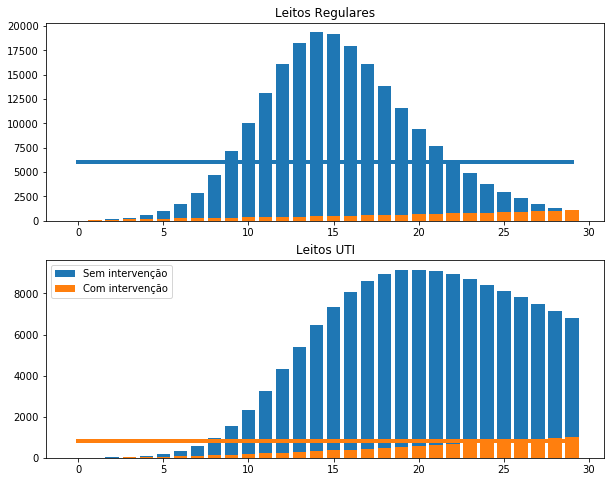

In [135]:
m1 = SEICHARDemographic(region=region, seed=seed)
m1.run(time_final)

m2 = SEICHARDemographic(region=region, seed=seed, R0=1.2)
m2.run(time_final)


plt.subplot(211)
y1 = m1.data['hospitalized', 'total'].values[:30]
y2 = m2.data['hospitalized', 'total'].values[:30]
T = np.arange(30)
plt.bar(T, y1, label='Sem intervenção')
plt.bar(T, y2, label= 'Com intervenção')
plt.plot(T, [m1.hospital_capacity] * 30, lw=4)
#plt.yscale('log')
plt.title('Leitos Regulares')


plt.subplot(212)
y1 = m1.data['critical', 'total'].values[:30]
y2 = m2.data['critical', 'total'].values[:30]
T = np.arange(30)
plt.bar(T, y1, label='Sem intervenção')
plt.bar(T, y2, label= 'Com intervenção')
plt.plot(T, [m1.icu_capacity] * 30, lw=1)
plt.plot(T, [m1.icu_capacity] * 30, lw=4)
#plt.yscale('log')
plt.legend()
plt.title('Leitos UTI')


In [121]:
m1.hospital_capacity

6028.500000000001

In [ ]:
t = m_base.data[('hospitalized', 'total')] + m_base.data[('critical', 'total')]
#for c in t.values:
#    print(int(c))

In [33]:
data = np.array(list(map(int, """77
52
53
42
59
62
50
54
43
64
51
51
47
60
63
59
62
46
51
54
52
48
53
52
56
50
46
49
48
48
43
66
49
61
66
63
53
70
58
66
85
61
72
67
91
78
85
114
76
93
106
100
105
99
118
107
103
104
111
119
161
125
123
108
138
143
164
201
238
308
287
405
443
478
567
658
616
588
575
622
470
423
336
182
68
9""".splitlines())))

In [51]:
xs = np.asarray(np.add.accumulate(data - 55), float)
n = len(xs)
for i in range(n):
    x = xs[i]
    decay = (1 - np.exp(-np.arange(n - i)/15))
    xs[i:] -=  * x
    
xs

array([ 2.20000000e+01,  1.75811537e+01,  1.31199514e+01, -3.02866572e+00,
       -1.77889125e+00,  2.76297962e+00, -4.71481025e+00, -7.72872764e+00,
       -2.11143125e+01, -1.20488111e+01, -1.52104700e+01, -1.74452269e+01,
       -2.26687344e+01, -1.36093313e+01, -9.34024444e-01,  7.49999579e+00,
        1.81643553e+01,  1.14209153e+01,  8.79537357e+00,  8.51394876e+00,
        5.63709064e+00, -1.61126224e+00, -3.73968293e+00, -6.61863796e+00,
       -5.07854363e+00, -9.24575102e+00, -1.68703814e+01, -2.04956917e+01,
       -2.39523239e+01, -2.60927211e+01, -3.18637304e+01, -1.29814781e+01,
       -1.07703613e+01,  3.60580883e+00,  2.22092250e+01,  3.58899341e+01,
        3.68896271e+01,  5.23167376e+01,  5.23422382e+01,  5.71838646e+01,
        7.77347032e+01,  6.98816013e+01,  6.94150526e+01,  6.05981882e+01,
        7.32157064e+01,  6.96193296e+01,  7.02482729e+01,  9.72409213e+01,
        8.20264600e+01,  8.08574449e+01,  8.99998172e+01,  9.00373546e+01,
        9.21678763e+01,  

In [52]:
xs = np.add.accumulate(data - 55)
xs = np.where(xs > 0, xs, 0)
xs

array([  22,   19,   17,    4,    8,   15,   10,    9,    0,    6,    2,
          0,    0,    0,    3,    7,   14,    5,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   27,   33,   50,   62,
         98,  121,  151,  210,  231,  269,  320,  365,  415,  459,  522,
        574,  622,  671,  727,  791,  897,  967, 1035, 1088, 1171, 1259,
       1368, 1514, 1697, 1950, 2182, 2532, 2920, 3343, 3855, 4458, 5019,
       5552, 6072, 6639, 7054, 7422, 7703, 7830, 7843, 7797])

In [53]:
for x in xs:
    print(x)

22
19
17
4
8
15
10
9
0
6
2
0
0
0
3
7
14
5
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27
33
50
62
98
121
151
210
231
269
320
365
415
459
522
574
622
671
727
791
897
967
1035
1088
1171
1259
1368
1514
1697
1950
2182
2532
2920
3343
3855
4458
5019
5552
6072
6639
7054
7422
7703
7830
7843
7797


## Necessidade de leitos

Projeção da quantidade de leitos necessários, ocupados e disponíveis na região

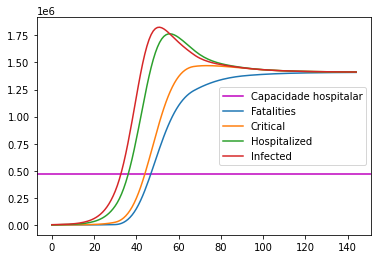

In [8]:
fig, ax = plt.subplots()
ax.axhline(y=model.hospital_total_capacity, color='m', label="Capacidade hospitalar")
RSEICHAPlot(model).plot()

Conforme o gráfico acima, o sistema de saúde atinge sua lotação máxima em **{{model.hospital_limit_time}}** dias. Ou seja, a partir do dia {{model.hospital_limit_date}}, todos os leitos dos hospitais estarão sendo usados (considerando apenas os pacientes com covid-19)

In [13]:
# Por mil habitantes
pormil = False # Falso para valores absolutos

nec [782492.6845761953, 273111.5266095693]
disp [149641.536, 68018.87999999999]
ocup [317988.2640000001, 144540.12]
total [467629.80000000005, 212559.0]


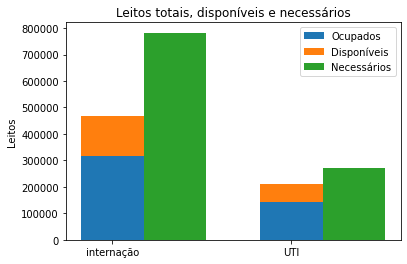

In [14]:
labels = ['internação', 'UTI']

available = [model.hospital_capacity, model.icu_capacity]
capacity = [model.hospital_total_capacity, model.icu_total_capacity]
required = [model.peak_hospitalization_demand, model.peak_icu_demand]
unavailable = [total-av for total, av in zip(capacity, available)]

label = ""
if pormil:
    pop = model.population
    label = "por mil habitantes"
    available = [item/pop * 1000 for item in available]
    capacity = [item/pop * 1000 for item in capacity]
    unavailable = [item/pop * 1000 for item in unavailable]
    required = [item/pop * 1000 for item in required]

print("nec", required)
print("disp", available)
print("ocup", unavailable)
print("total", capacity)

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, unavailable, width, label='Ocupados')
ax.bar(labels, available, width, bottom=unavailable, label='Disponíveis')
ax.bar(width+x, required, width, label='Necessários')

ax.set_ylabel('Leitos'+label)
ax.set_title('Leitos totais, disponíveis e necessários')
ax.legend()

plt.show()

In [93]:
peak = model.peak_hospitalization_demand
h = model['hospitalized']
day_collapsed = model.hospital_limit_time
days_to_peak = int(h.index[h == peak].to_list()[0])
h = h[day_collapsed:days_to_peak]

width = 0.75
fig, ax = plt.subplots()

ax.axhline(y=model.hospital_capacity, color='m', label="Capacidade hospitalar")
ax.bar(h.index, h, width, label="Hospitalizações")

ax.set_ylabel('Leitos')
ax.set_xlabel('Dia')
plt.legend()
plt.show()

In [88]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

In [89]:
table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

KeyboardInterrupt: 

     |████████████████████████████████| 81kB 425kB/s eta 0:00:01


In [91]:
from covid import data

In [109]:
a = data.age_distribution('Italy', 2020)
b = data.age_distribution('Brazil', 2020)

In [110]:
aa = a / a.sum()
bb = b / b.sum()

In [111]:
np.abs(aa - bb).sum() / 2

0.21629324873777292

In [112]:
(aa - bb) * 0.5 / (aa + bb)

age
0-4     -0.139113
5-9     -0.108710
10-14   -0.098019
15-19   -0.115983
20-24   -0.123750
25-29   -0.104050
30-34   -0.091693
35-39   -0.075697
40-44   -0.015376
45-49    0.051792
50-54    0.073664
55-59    0.085442
60-64    0.094837
65-69    0.125598
70-74    0.191940
75-79    0.226384
80-84    0.277420
85-89    0.306940
90-94    0.314918
95-99    0.318349
100+     0.239983
dtype: float64

In [137]:
import scipy.optimize as opt

cm = data.contact_matrix('Italy', coarse=True)
d = data.age_distribution('Italy', 2010, coarse=True) * 1000
db = data.age_distribution('Brazil', 2010, coarse=True) * 1000

pd.DataFrame(cm.values * d.values[:, None])

,0,1,2,3,4,5,6,7,8
0,93069900.0,10098000.0,6283200.0,20027700.0,21037500.0,15651900.0,7180800.0,2136288.0,1005312.0
1,14930580.0,201731220.0,15042840.0,11282130.0,28738560.0,41592330.0,13976370.0,9160416.0,4310784.0
2,11203500.0,22919160.0,95197740.0,30793620.0,25608000.0,25351920.0,16709220.0,6399439.2,3011500.8
3,37838820.0,23066130.0,61250510.0,89586430.0,64965280.0,43281390.0,45441140.0,8811780.0,4146720.0
4,40866540.0,60680620.0,47725260.0,70587660.0,80780480.0,60490100.0,45153240.0,12761029.6,6005190.4
5,16465160.0,23158940.0,32545620.0,29852720.0,41932300.0,50395700.0,34238300.0,9417456.0,4431744.0
6,12586620.0,5751950.0,10962540.0,19759640.0,15496430.0,21180710.0,30045480.0,9203120.0,4330880.0
7,9324220.0,6178700.0,7807630.0,8088480.0,11065490.0,14211010.0,17356530.0,4850841.2,2282748.8
8,5740280.0,3803800.0,4806620.0,4979520.0,6812260.0,8748740.0,10685220.0,2986328.8,1405331.2


In [160]:
n1 = d.values / d.sum()

def objective(n):
    res =  (n * cm.values - (n * cm.values.T).T)
    res *= res
    return res.sum() + (n.sum() - 1)**2

def fn(yy, c='Italy'):
    n = data.age_distribution(c, yy, coarse=True).values * 1.0
    n /= n.sum()
    return objective(n)

[(yy, fn(yy)) for yy in range(1980, 2020)]

[(1980, 0.915341794211508),
 (1981, 0.9084800946301557),
 (1982, 0.9032108570034578),
 (1983, 0.8991275072776779),
 (1984, 0.8919956256379671),
 (1985, 0.8772406235261481),
 (1986, 0.8473856621627329),
 (1987, 0.8137237188378958),
 (1988, 0.7837142976155329),
 (1989, 0.7622676224413012),
 (1990, 0.7505183813434855),
 (1991, 0.7405087156671306),
 (1992, 0.741207084648654),
 (1993, 0.7535537188253171),
 (1994, 0.7736064464091197),
 (1995, 0.7957529442149447),
 (1996, 0.8137234320042827),
 (1997, 0.8343566988508401),
 (1998, 0.8579490372167493),
 (1999, 0.8850095962459846),
 (2000, 0.9120660002633038),
 (2001, 0.9574243342464954),
 (2002, 1.0063540090391017),
 (2003, 1.06158527303765),
 (2004, 1.1205931419509272),
 (2005, 1.1793667108107404),
 (2006, 1.1998071890298019),
 (2007, 1.21779638010146),
 (2008, 1.2348740383355303),
 (2009, 1.2527498610104375),
 (2010, 1.2742247658933021),
 (2011, 1.2883229760561763),
 (2012, 1.306928619487542),
 (2013, 1.3311639598292717),
 (2014, 1.35600188114

In [24]:
model

NameError: name 'model' is not defined

In [59]:
from covid import data

In [63]:
df = data.brazil_healthcare_capacity()
df[df.region == 'São Paulo']

,region,regular,icu,cases_influenza_regular,cases_influenza_icu,cases_other_regular,cases_other_icu,mechanical_ventilators,children,adults,elderly,population
ref,,,,,,,,,,,,
355030,São Paulo,13534,1937,693,91,8137,1250,6250,2713332,7491395,1352785,11557512


In [64]:
region.icu_beds_pm

0.17212418213244354

In [65]:
region.icu_occupancy_rate

0.6923076923076923

In [66]:
L = list(map(int, ['350390', '350660', '351570', '351830', '351880', '352310', '353060', '353980', '354500', '354680', '355250', '350900', '350920', '351630', '351640', '352850', '350570', '351060', '352250', '352500', '353440', '353910', '354730', '351380', '352940', '354330', '354410', '354780', '354870', '354880', '351300', '351500', '351510', '352220', '352620', '354995', '355280', '355645', '355030']))

In [72]:
L_ = [x for x in L if x in df.index]

In [81]:
df.loc[L_].icu.sum()

2880

In [82]:
df.loc[L_].regular.sum()

20734

In [140]:
df.loc[L_].population.sum()

20004795

In [139]:
df.population.sum()

180981081

In [145]:
np.exp(-(8 - np.arange(9))/4)

array([0.13533528, 0.17377394, 0.22313016, 0.2865048 , 0.36787944,
       0.47236655, 0.60653066, 0.77880078, 1.        ])